<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/Clasificaci%C3%B3n_de_d%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Dataset**

In [ ]:
from sklearn.datasets import load_digits  # Importa la función para cargar el conjunto de datos de dígitos
digits = load_digits()  # Carga el dataset de dígitos escritos a mano (0–9) de scikit-learn

In [ ]:
digits.keys()  # Muestra las claves (keys) del diccionario que contiene los datos del dataset, como 'data', 'target', 'images', etc.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(digits.DESCR)  # Imprime la descripción completa del dataset 'digits' (información general, contenido y propósito)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

# **Visualización de una imagen**

In [ ]:
index = 0  # Asigna el valor 0 a la variable 'index' para seleccionar el primer elemento del dataset

In [ ]:
image = digits.images[index]  # Obtiene la imagen del dígito en la posición indicada por 'index'
label = digits.target[index]  # Obtiene la etiqueta correspondiente a esa imagen

In [ ]:
print(image) # Imprime la imagen

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


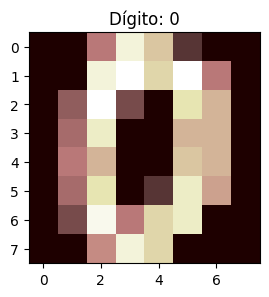

In [ ]:
import matplotlib.pyplot as plt  # Importa Matplotlib para graficar imágenes

plt.figure(figsize=(3, 3))  # Crea una figura de tamaño 3x3 pulgadas
plt.imshow(image, cmap=plt.cm.pink)  # Muestra la imagen del dígito con una paleta de color rosada
plt.title(f'Dígito: {label}')  # Coloca el título indicando el número del dígito mostrado
plt.show()  # Muestra la imagen


# **Preprocesamiento de datos**

In [ ]:
import tensorflow as tf  # Importa TensorFlow para construir y entrenar modelos neuronales
from sklearn.model_selection import train_test_split  # Importa función para dividir datos en entrenamiento y prueba
from tensorflow.keras.utils import to_categorical  # Importa utilidad para convertir etiquetas a formato one-hot

X_train, X_test, y_train, y_test = train_test_split(  # Divide los datos y etiquetas en conjuntos de entrenamiento y prueba
    digits.data, digits.target,  # Usa las imágenes (datos) y sus etiquetas
    test_size=0.2, random_state=42  # Asigna 20% de los datos para prueba y fija una semilla aleatoria
)

y_train = to_categorical(y_train, num_classes=10)  # Convierte las etiquetas de entrenamiento a (10 clases)
y_test = to_categorical(y_test, num_classes=10)  # Convierte las etiquetas de prueba a (10 clases)


In [ ]:
print(X_train.shape)  # Imprime el conjunto de entrenamiento (número de muestras, características)
print(X_test.shape)  # Imprime el conjunto de prueba (número de muestras, características)

(1437, 64)
(360, 64)


In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))  # Cambia la forma del primer elemento de X_train a una matriz de 8x8 (imagen)
print(reshaped_tensor)  # Imprime el tensor de la imagen en formato de matriz

tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Importa herramientas para escalar (normalizar) datos numéricos

# Normalizar los datos
scaler = StandardScaler()  # Crea un objeto para escalar los datos usando la media y desviación estándar
X_train = scaler.fit_transform(X_train)  # Ajusta el escalador con X_train y transforma los datos de entrenamiento
X_test = scaler.transform(X_test)  # Transforma los datos de prueba usando el mismo escalado que X_train

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))  # Reorganiza el primer elemento de X_train en una matriz de 8x8
# Redondeamos para tener una mejor visualización
reshaped_tensor = tf.floor(reshaped_tensor * 100) / 100  # Redondea los valores a 2 decimales hacia abajo para simplificar la vista
print(reshaped_tensor)  # Imprime la matriz reestructurada y redondeada

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [ ]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))  # Cambia la forma de X_train a matrices de 8x8 por muestra
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))  # Cambia la forma de X_test a matrices de 8x8 por muestra

# **Red neuronal convolucional**

In [ ]:
from tensorflow.keras.models import Sequential  # Importa el modelo secuencial de Keras para construir redes neuronales
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  # Importa capas necesarias para una CNN

# Crear el modelo de CNN
model = Sequential([  # Inicializa un modelo secuencial (capas en orden lineal)
    Conv2D(32, kernel_size=(3, 3),  # Capa convolucional con 32 filtros de 3x3
        activation='relu',  # Usa la función de activación ReLU
        input_shape=(8, 8, 1)  # Define la forma de entrada: imágenes de 8x8 con 1 canal
    ),
    MaxPooling2D(pool_size=(2, 2)),  # Capa de reducción de tamaño (pooling) 2x2 para disminuir la dimensionalidad
    Flatten(),  # Aplana los datos 2D a un vector 1D para conectar con capas densas
    Dense(128, activation='relu'),  # Capa totalmente conectada con 128 neuronas y activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por dígito) y activación softmax
])

# **Compilar el modelo**

In [ ]:
from tensorflow.keras.optimizers import Adam  # Importa el optimizador Adam desde Keras

# Tasa de aprendizaje deseada
learning_rate = 0.001  # Define la tasa de aprendizaje (qué tan rápido aprende el modelo)
adam_optimizer = Adam(learning_rate=learning_rate)  # Crea una instancia del optimizador Adam con esa tasa de aprendizaje

In [ ]:
model.compile(  # Configura el modelo antes del entrenamiento
    optimizer='adam',  # Define el optimizador Adam para ajustar los pesos
    loss='categorical_crossentropy',  # Usa la función de pérdida para clasificación multiclase
    metrics=['accuracy']  # Mide la precisión durante el entrenamiento y prueba
)

# **Entrenar el modelo**

In [ ]:
history = model.fit(  # Entrena el modelo con los datos de entrenamiento
    X_train, y_train,  # Datos de entrada y sus etiquetas
    epochs=10,  # Número de veces que el modelo verá todo el conjunto de entrenamiento
    batch_size=32,  # Tamaño del lote (número de muestras procesadas antes de actualizar los pesos)
    validation_split=0.2  # Usa el 20% del conjunto de entrenamiento para validación
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3967 - loss: 1.9855 - val_accuracy: 0.8229 - val_loss: 0.8577
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9220 - loss: 0.6025 - val_accuracy: 0.9062 - val_loss: 0.3934
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9567 - loss: 0.2547 - val_accuracy: 0.9236 - val_loss: 0.2775
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9738 - loss: 0.1397 - val_accuracy: 0.9375 - val_loss: 0.2087
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9808 - loss: 0.1063 - val_accuracy: 0.9306 - val_loss: 0.1954
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9837 - loss: 0.0858 - val_accuracy: 0.9514 - val_loss: 0.1566
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9888 - loss: 0.0718 - val_accuracy: 0.9653 - val_loss: 0.1196
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9922 - loss: 0.0487 - val_accuracy: 0.9653 - val_loss

# **Función de pérdida**

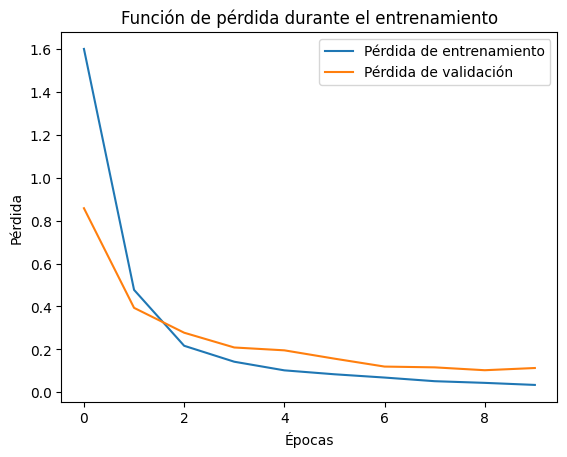

In [ ]:
import matplotlib.pyplot as plt  # Importa la librería Matplotlib para graficar

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')  # Grafica la pérdida del modelo en entrenamiento por época
plt.plot(history.history['val_loss'], label='Pérdida de validación')  # Grafica la pérdida del modelo en validación por época
plt.xlabel('Épocas')  # Etiqueta del eje X (número de épocas)
plt.ylabel('Pérdida')  # Etiqueta del eje Y (valor de la pérdida)
plt.legend()  # Muestra la leyenda para identificar las curvas
plt.title('Función de pérdida durante el entrenamiento')  # Título del gráfico
plt.show()  # Muestra la gráfica

# **Evaluación**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)  # Evalúa el modelo con los datos de prueba y obtiene la pérdida y precisión
print(f'Loss: {loss}, Accuracy: {accuracy}')  # Imprime la pérdida y la precisión obtenidas en el conjunto de prueba

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9793 - loss: 0.0613  
Loss: 0.06982646137475967, Accuracy: 0.9750000238418579


# **Matriz de confusión y la sensibilidad (recall)**

In [ ]:
import numpy as np  # Importa NumPy para manejo de arreglos numéricos
from sklearn.metrics import confusion_matrix, recall_score  # Importa funciones para métricas de clasificación

y_pred = model.predict(X_test)  # Genera las predicciones del modelo sobre los datos de prueba
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtiene la clase con mayor probabilidad para cada predicción
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)  # Convierte las etiquetas one-hot a formato de clases (números del 0 al 9)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)  # Calcula la matriz de confusión entre etiquetas reales y predichas
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)  # Calcula la sensibilidad (recall) por clase

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


# **Visualizar la matriz de confusión y mostrar la sensibilidad para cada clase**

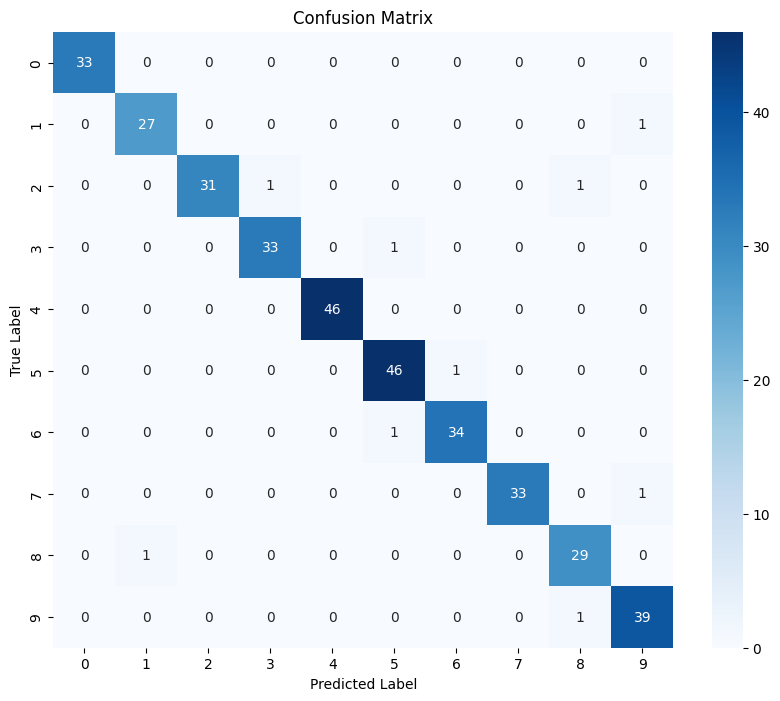

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 0.9393939393939394
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 0.9666666666666667
Class 9: 0.975


In [ ]:
import seaborn as sns  # Importa Seaborn para visualización avanzada de datos
import matplotlib.pyplot as plt  # Importa Matplotlib para crear gráficos

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))  # Crea una figura de tamaño 10x8 pulgadas
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Dibuja la matriz de confusión con anotaciones y colores azules
plt.xlabel('Predicted Label')  # Etiqueta del eje X (clases predichas)
plt.ylabel('True Label')  # Etiqueta del eje Y (clases reales)
plt.title('Confusion Matrix')  # Título del gráfico
plt.show()  # Muestra la gráfica en pantalla

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')  # Imprime encabezado del resultado
for i in range(10):  # Recorre las 10 clases (dígitos del 0 al 9)
    print(f'Class {i}: {sensitivity[i]}')  # Imprime la sensibilidad (recall) de cada clase